### Особенность данных - для устройств Android наблюдаем более высокие юзерские отмены.
### Гипотеза - Если UI приложения Android сделать похожим на приложение IOS, то это повысит конверсию в поездку на 3%.

In [42]:
# Загрузка данных

import pandas as pd

df = pd.read_csv(r'C:\Users\AAA\Desktop\new_dataframe.csv')

df.head(5)

,Unnamed: 0,user_id,hour,os,order_class,surge,app_opened,price_seen,order_made,ride_completed,user_cancelled,city_center_order,distance,age,rfm
0,0,867689,12,iOS,business,no surge,1,1,1,1,0,0,7.982135,20,low
1,1,752172,5,Android,economy,no surge,1,1,1,1,0,1,2.908468,27,high
2,2,486559,15,Android,comfort,no surge,1,1,1,1,0,0,7.224614,21,high
3,3,304024,0,Android,economy,no surge,1,1,1,1,0,1,1.874349,52,low
4,4,139420,0,Android,business,no surge,1,1,1,1,0,0,10.704778,19,low


In [192]:
# Фильтрация по OS

df_android = df[df['os'] == 'Android']

# Удаление строк, где значение в столбце 'distance' является null
df_android = df_android.dropna(subset=['distance'])
df_android = df_android.dropna(subset=['age'])

# Оставляем только уникальные user_id с медиальными значениями по distance, age и hour
df_android_median = df_android.groupby('user_id').agg({
    'hour': 'median',
    'os': 'first',
    'order_class': 'first',
    'distance': 'median',
    'age': 'median',
    
}).reset_index()

df_android_median.head(5)

,user_id,hour,os,order_class,distance,age
0,100093,4.0,Android,economy,4.806005,21.0
1,100118,12.0,Android,economy,0.809886,26.0
2,100134,16.5,Android,comfort,5.620284,25.0
3,100166,8.0,Android,economy,2.809604,18.0
4,100255,6.0,Android,business,5.208766,27.0


In [194]:
# Распределение по группам случайным образом с фиксацией случайности.

group_a = df_android_median.sample(frac=0.5, random_state=42)  # Группа A (50% случайно выбранных строк)
group_b = df_android_median.drop(group_a.index)  # Группа B (оставшиеся строки)

C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


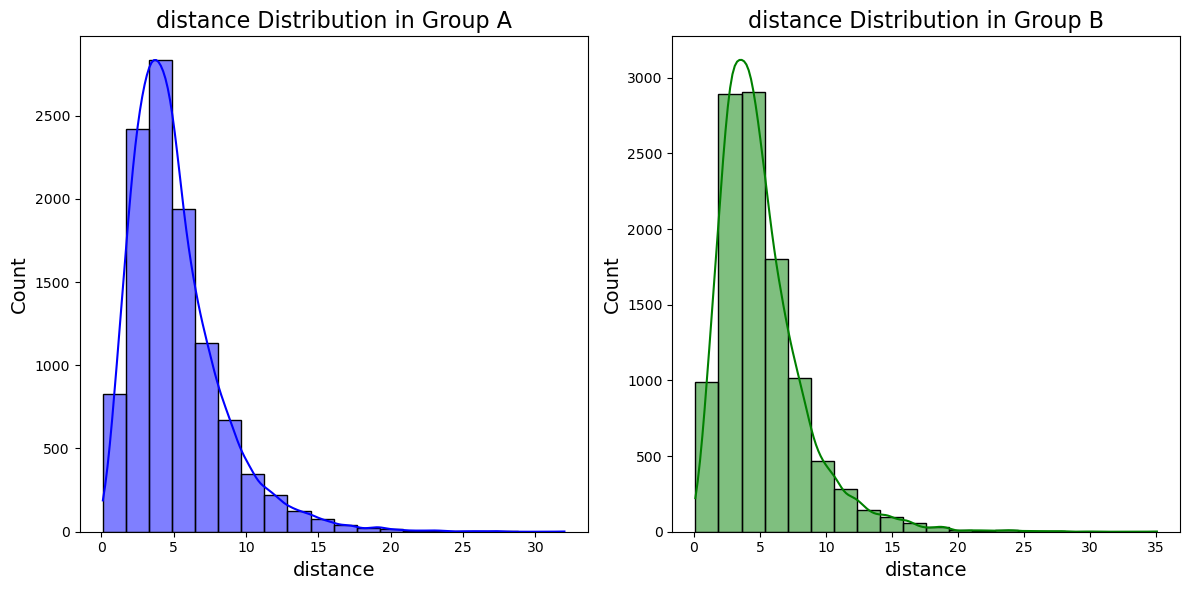

In [199]:
import seaborn as sns
import matplotlib.pyplot as plt

# График распределения для группы A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Два графика в одной строке
sns.histplot(group_a['distance'], kde=True, color='blue', bins=20)
plt.title('distance Distribution in Group A', fontsize=16)
plt.xlabel('distance', fontsize=14)
plt.ylabel('Count', fontsize=14)

# График распределения для группы B
plt.subplot(1, 2, 2)
sns.histplot(group_b['distance'], kde=True, color='green', bins=20)
plt.title('distance Distribution in Group B', fontsize=16)
plt.xlabel('distance', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

In [196]:
# Т.к. распределения логонормальные, t-тест не подходит. Проведем тест Манна-Уитни для сравнения групп.

from scipy.stats import mannwhitneyu

stat, p_val = mannwhitneyu(group_a['distance'], group_b['distance'])
print(f"Mann-Whitney U test: p-value = {p_val}")

Mann-Whitney U test: p-value = 0.5312836946889892


### Значение p-value = 0.53 гораздо больше стандартных значений, например 0,05. Можно сказать, что выборки не имеют статистически значимых различий.

### Также проверим столбец Age.

C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


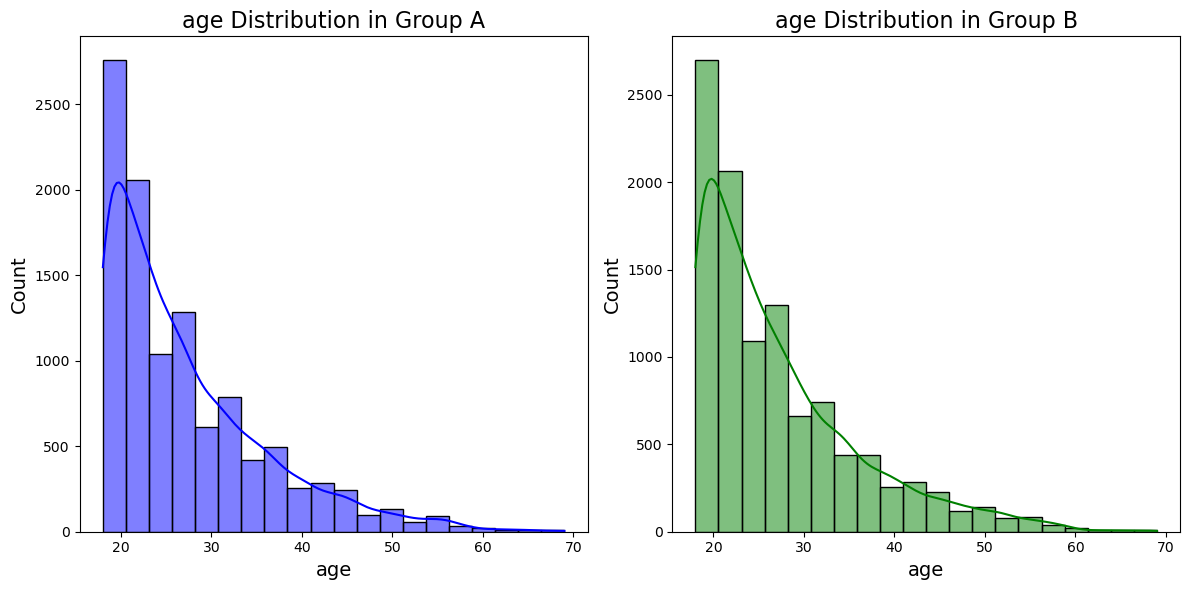

In [203]:
# График распределения для группы A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Два графика в одной строке
sns.histplot(group_a['age'], kde=True, color='blue', bins=20)
plt.title('age Distribution in Group A', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# График распределения для группы B
plt.subplot(1, 2, 2)
sns.histplot(group_b['age'], kde=True, color='green', bins=20)
plt.title('age Distribution in Group B', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

In [201]:
# Т.к. распределения логонормальные, t-тест не подходит. Проведем тест Манна-Уитни для сравнения групп.

stat, p_val = mannwhitneyu(group_a['age'], group_b['age'])
print(f"Mann-Whitney U test: p-value = {p_val}")

Mann-Whitney U test: p-value = 0.6186889190241762


### Можно сделать вывод, что группы достаточно однородны.

###

### Особенность данных - Если классы Comfort или Business, то юзерские отмены более низкие и более длинные поездки.
### Гипотеза - Если внедрить тариф "Попутчики" для класса Economy, это может снизить стоимость поездки, а значит повысить конверсию в поездки, уменьшить отмены.

In [207]:
# Фильтрация по order_class

df_economy = df[df['order_class'] == 'economy']

# Удаление строк, где значение в столбце 'order_class' является null
df_economy = df_economy.dropna(subset=['distance'])
df_economy = df_economy.dropna(subset=['age'])

# Оставляем только уникальные user_id с медиальными значениями по distance, age и hour
df_economy_median = df_economy.groupby('user_id').agg({
    'hour': 'median',
    'os': 'first',
    'order_class': 'first',
    'distance': 'median',
    'age': 'median',
    
}).reset_index()

df_economy_median.head(5)

,user_id,hour,os,order_class,distance,age
0,100093,4.0,iOS,economy,9.090279,21.0
1,100118,22.0,iOS,economy,0.960993,26.0
2,100134,19.0,Android,economy,4.658687,25.0
3,100166,8.0,Android,economy,2.809604,18.0
4,100255,9.0,iOS,economy,2.999283,27.0


In [245]:
# Распределение по группам случайным образом с фиксацией случайности.

group_a2 = df_android_median.sample(frac=0.5, random_state=24)  # Группа A (50% случайно выбранных строк)
group_b2 = df_android_median.drop(group_a2.index)  # Группа B (оставшиеся строки)

C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


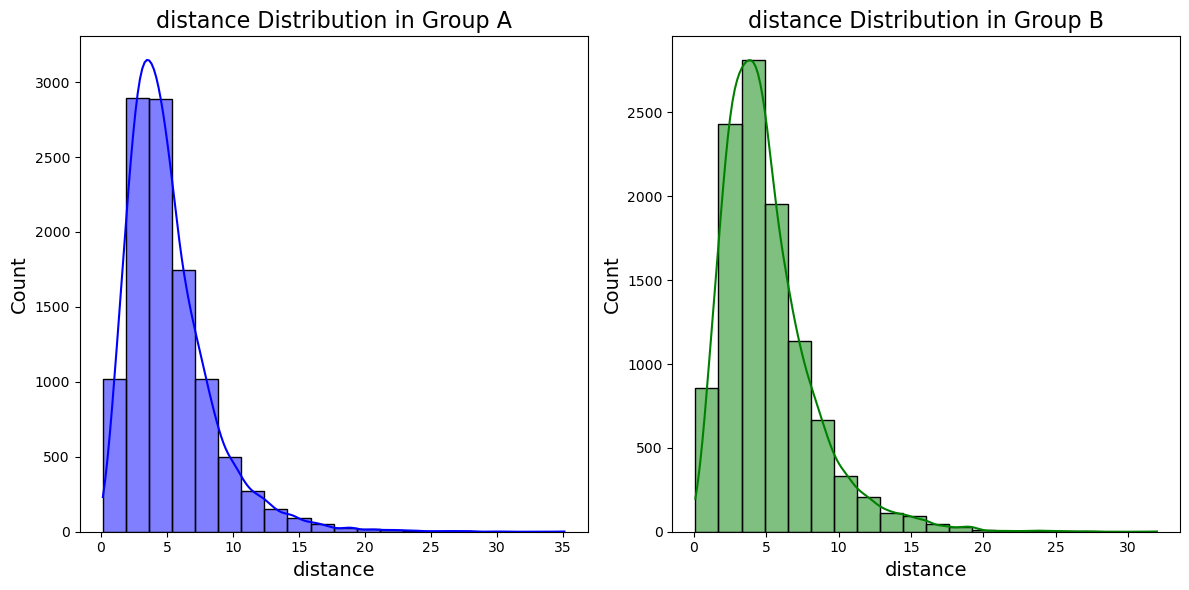

In [251]:
# График распределения для группы A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Два графика в одной строке
sns.histplot(group_a2['distance'], kde=True, color='blue', bins=20)
plt.title('distance Distribution in Group A', fontsize=16)
plt.xlabel('distance', fontsize=14)
plt.ylabel('Count', fontsize=14)

# График распределения для группы B
plt.subplot(1, 2, 2)
sns.histplot(group_b2['distance'], kde=True, color='green', bins=20)
plt.title('distance Distribution in Group B', fontsize=16)
plt.xlabel('distance', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

In [247]:
# Проведем тест Манна-Уитни для сравнения групп.

stat, p_val = mannwhitneyu(group_a2['distance'], group_b2['distance'])
print(f"Mann-Whitney U test: p-value = {p_val}")

Mann-Whitney U test: p-value = 0.5502858793490073


C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\AAA\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


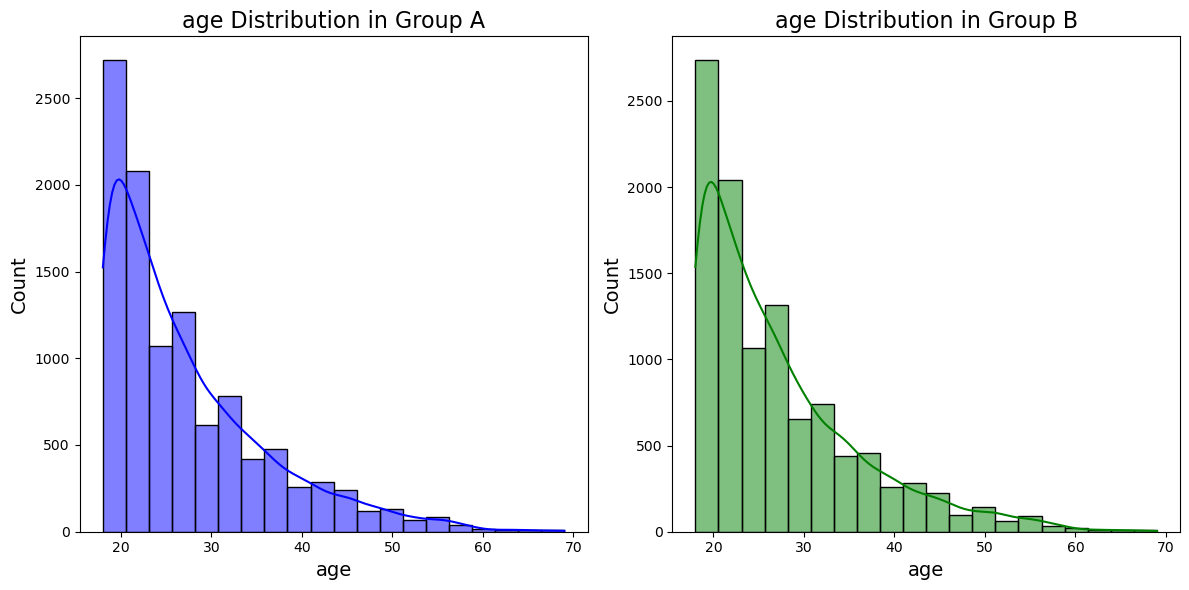

In [253]:
# График распределения для группы A
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Два графика в одной строке
sns.histplot(group_a2['age'], kde=True, color='blue', bins=20)
plt.title('age Distribution in Group A', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)

# График распределения для группы B
plt.subplot(1, 2, 2)
sns.histplot(group_b2['age'], kde=True, color='green', bins=20)
plt.title('age Distribution in Group B', fontsize=16)
plt.xlabel('age', fontsize=14)
plt.ylabel('Count', fontsize=14)


plt.tight_layout()
plt.show()

In [249]:
# Проведем тест Манна-Уитни для сравнения групп.

stat, p_val = mannwhitneyu(group_a2['age'], group_b2['age'])
print(f"Mann-Whitney U test: p-value = {p_val}")

Mann-Whitney U test: p-value = 0.8389204167098565


### Можно сделать вывод, что группы достаточно однородны.